In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

In [2]:
dta = sm.datasets.fair.load_pandas().data

In [3]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [4]:
for i in dta.columns:
    print(i,"is",dta[i].dtype)

rate_marriage is float64
age is float64
yrs_married is float64
children is float64
religious is float64
educ is float64
occupation is float64
occupation_husb is float64
affairs is float64


In [5]:
for i in ['rate_marriage','religious','educ','occupation','occupation_husb']:
    dta[i]=dta[i].astype('category')

In [6]:
for i in dta.columns:
    print(i,"is",dta[i].dtype)

rate_marriage is category
age is float64
yrs_married is float64
children is float64
religious is category
educ is category
occupation is category
occupation_husb is category
affairs is float64


## Here we have the following Categorical Variables: 
### 1) rate_marriage
### 2) religious
### 3) educ
### 4) occupation
### 5) occupation_husb

In [7]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [8]:
#add "affair" column: 1 represents having affairs, 0represents not 
dta['affair'] = (dta.affairs >0).astype(int)

In [9]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [10]:
dta['affair']=dta['affair'].astype('category')

In [11]:
dta['affair_bool']=dta['affair'].astype(bool)

In [12]:
dta.describe()

,age,yrs_married,children,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000
mean,29.082862,9.009425,1.396874,0.705374
std,6.847882,7.280120,1.433471,2.203374
min,17.500000,0.500000,0.000000,0.000000
25%,22.000000,2.500000,0.000000,0.000000
50%,27.000000,6.000000,1.000000,0.000000
75%,32.000000,16.500000,2.000000,0.484848
max,42.000000,23.000000,5.500000,57.599991


In [13]:
dta['affair_bool'].value_counts()

False    4313
True     2053
Name: affair_bool, dtype: int64

In [14]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [15]:
X.head()

,Intercept,rate_marriage[T.2.0],rate_marriage[T.3.0],rate_marriage[T.4.0],rate_marriage[T.5.0],religious[T.2.0],religious[T.3.0],religious[T.4.0],educ[T.12.0],educ[T.14.0],...,C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],age,yrs_married,children
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,9.0,3.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0,13.0,3.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,2.5,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,37.0,16.5,4.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0,9.0,1.0


In [16]:
y.head()

,affair[0],affair[1]
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [17]:
y= np.ravel(y)

In [18]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [19]:
X.head()

,Intercept,rate_marriage[T.2.0],rate_marriage[T.3.0],rate_marriage[T.4.0],rate_marriage[T.5.0],religious[T.2.0],religious[T.3.0],religious[T.4.0],educ[T.12.0],educ[T.14.0],...,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,age,yrs_married,children
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,9.0,3.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0,13.0,3.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,2.5,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,37.0,16.5,4.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0,9.0,1.0


## Exploratory Data Analysis

In [20]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,affair_bool
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,True
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,True
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,True
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,True
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,True


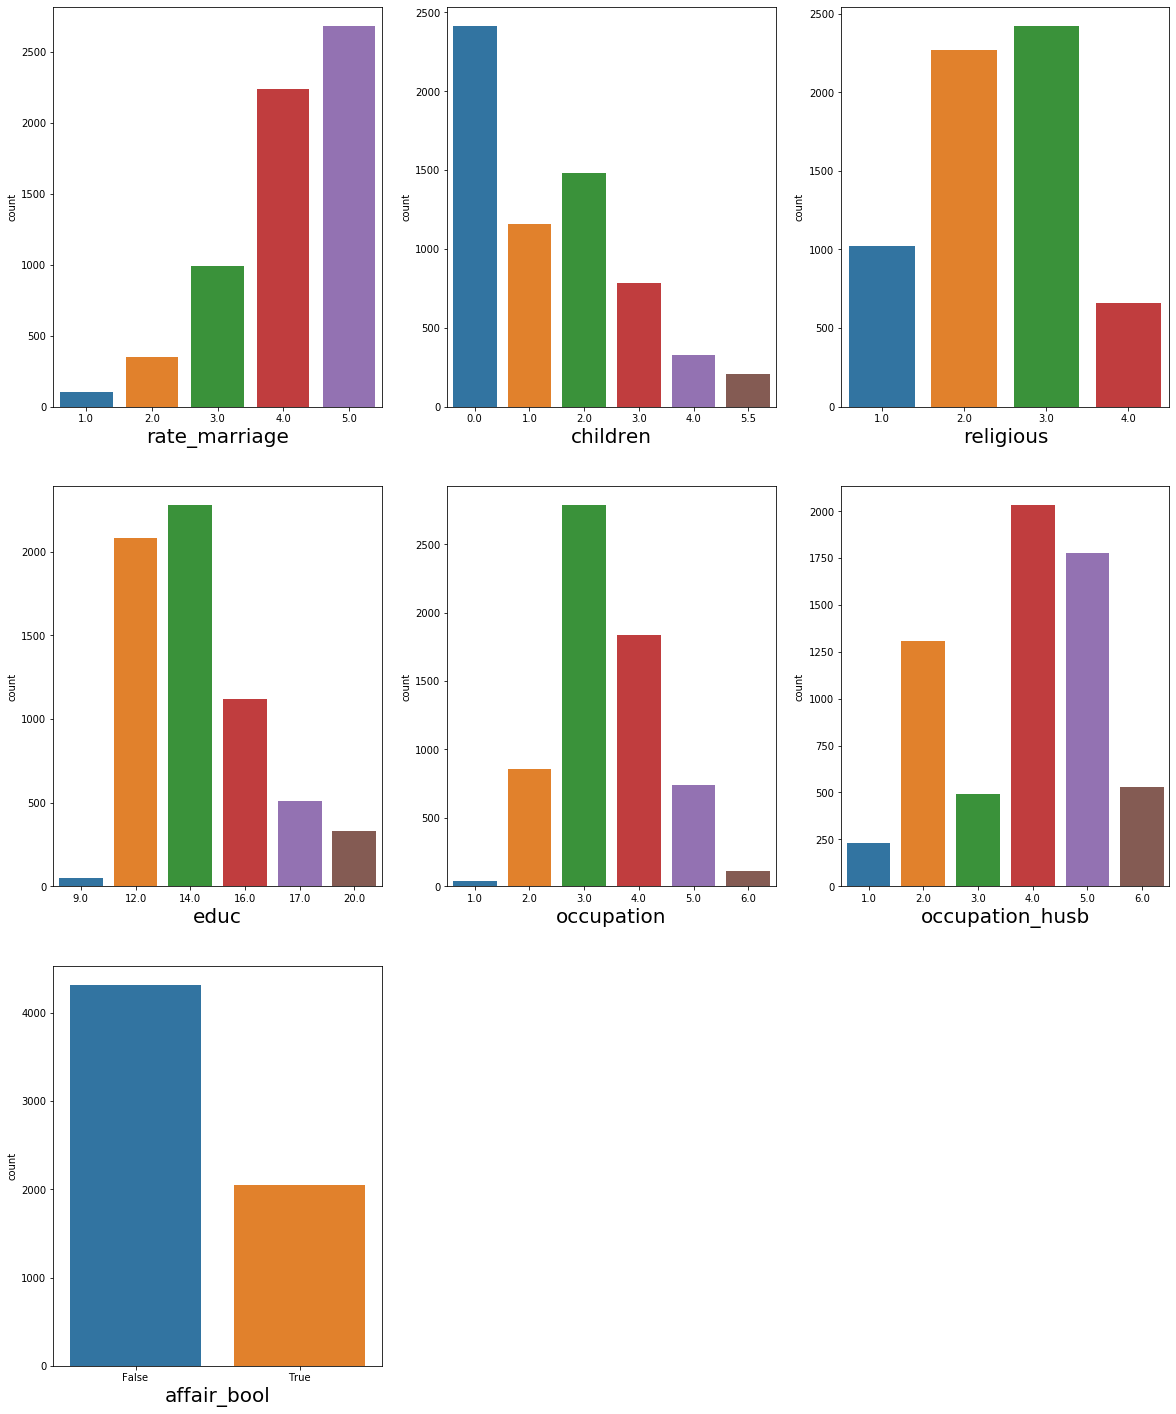

In [21]:
## Exploring the distribution of the categorical features using countplot
plt.figure(figsize=(20,25))
plotnumber = 1

for column in ['rate_marriage', 'children', 'religious', 'educ','occupation', 'occupation_husb','affair_bool']:
    if plotnumber<8 :    
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(dta[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Most of the women rated their marrage 5
#### Most of the women have 0 children
#### Most of the women rated themselves 3 on religious scale
#### Most of the women rated themselves 14 on education scale
#### Most of the women rated themselves 3 on occupation that means most women do white-collar jobs
#### Most of the women rated 4 on husbands occupation that means husbands of most of the women are Teachers 

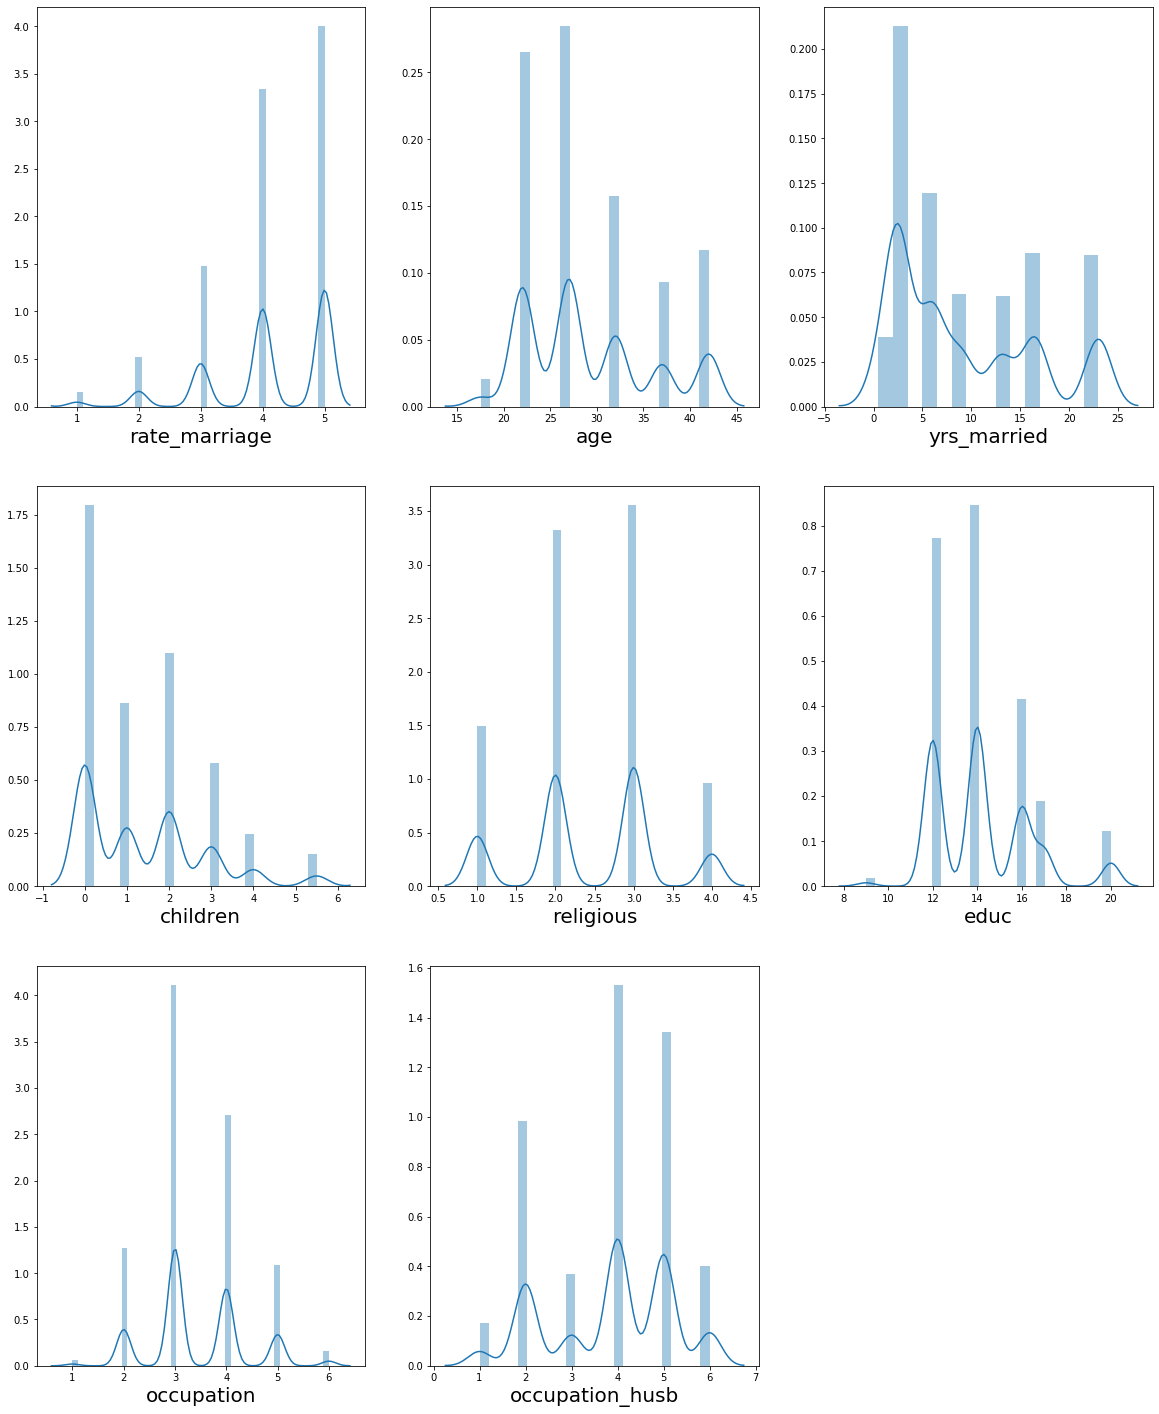

In [22]:
## Exploring the distribution of the features using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<9 :     
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

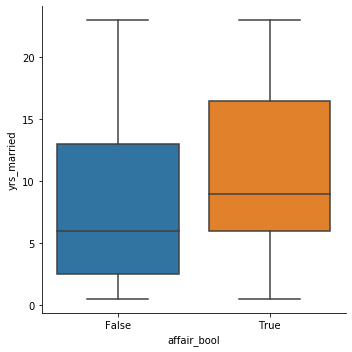

In [23]:
sns.catplot(x="affair_bool", y="yrs_married", kind="box", data=dta)
plt.show()

### Most of the women who did not have extra-marital affair are newly married 

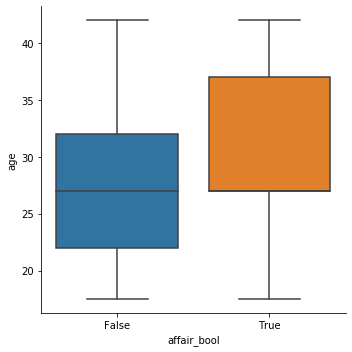

In [24]:
sns.catplot(x="affair_bool", y="age", kind="box", data=dta)
plt.show()

### Most of the women who did not have extra-marital affair are young women

<Figure size 1440x1800 with 0 Axes>

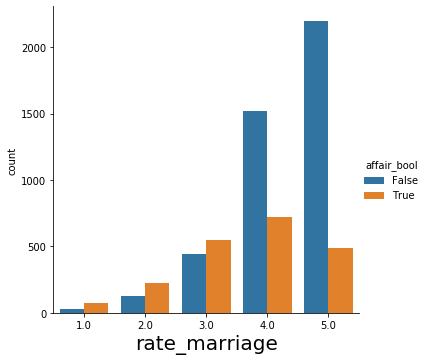

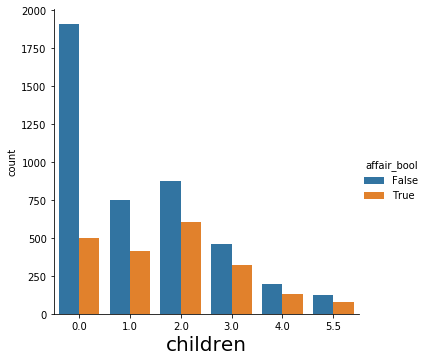

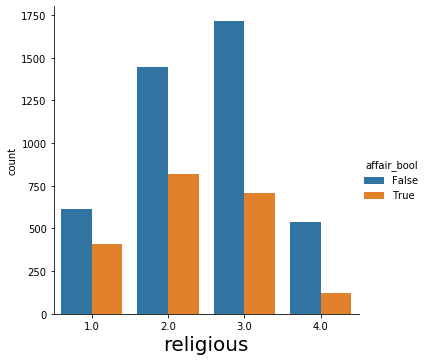

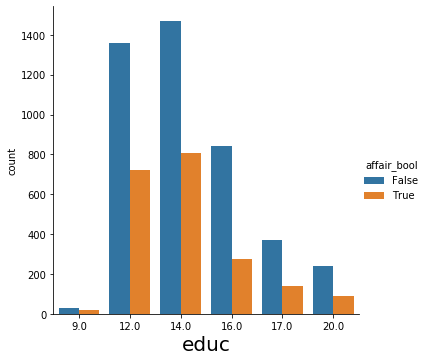

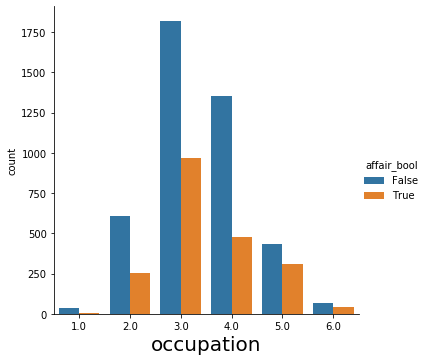

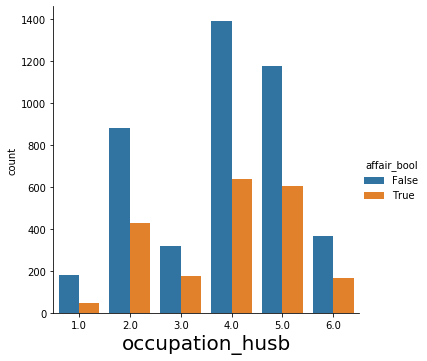

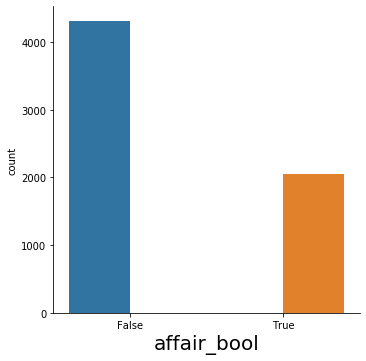

In [25]:
## Exploring the distribution of the categorical features for women having affairs and not having affairs

plt.figure(figsize=(20,25))
plotnumber = 1

for column in ['rate_marriage', 'children', 'religious', 'educ','occupation', 'occupation_husb','affair_bool']:
    if plotnumber<8 :    
        sns.catplot(x=column,kind='count',hue='affair_bool',data=dta)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    plt.show()
    


## Fitting the model: 

In [26]:
y=dta['affair']

In [27]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled = scalar.fit_transform(X)

In [28]:
X_scaled

array([[ 0.00000000e+00, -2.40471455e-01,  2.32612900e+00, ...,
         4.26024735e-01, -1.29473293e-03,  1.11844056e+00],
       [ 0.00000000e+00, -2.40471455e-01,  2.32612900e+00, ...,
        -3.04185400e-01,  5.48189921e-01,  1.11844056e+00],
       [ 0.00000000e+00, -2.40471455e-01, -4.29898771e-01, ...,
        -1.03439554e+00, -8.94207296e-01, -9.74546337e-01],
       ...,
       [ 0.00000000e+00, -2.40471455e-01, -4.29898771e-01, ...,
        -1.03439554e+00, -8.94207296e-01, -9.74546337e-01],
       [ 0.00000000e+00, -2.40471455e-01, -4.29898771e-01, ...,
         4.26024735e-01, -4.13408224e-01, -2.76884039e-01],
       [ 0.00000000e+00, -2.40471455e-01, -4.29898771e-01, ...,
        -1.03439554e+00, -8.94207296e-01, -9.74546337e-01]])

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.30, random_state = 22)

In [30]:
X.shape

(6366, 26)

In [31]:
y.shape

(6366,)

In [32]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [33]:
lgr=lgr.fit(X_train,y_train)

In [34]:
lgr.score(X_train, y_train)

0.7237432675044884

In [35]:
lgr.score(X_test, y_test)

0.7387434554973822

In [36]:
y_pred = lgr.predict(X_test)

In [37]:
pd.DataFrame((y_pred,y_test),index=("Predicted_y","Actual_y")).T

,Predicted_y,Actual_y
0,1,1
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
1905,1,0
1906,1,1
1907,0,0
1908,1,0


In [38]:
probabilities = lgr.predict_proba(X_test)

In [39]:
pd.DataFrame((y_pred,y_test,probabilities),index=("Predicted_y","Actual_y",'Probabilities')).T

,Predicted_y,Actual_y,Probabilities
0,1,1,"[0.18739132369155587, 0.8126086763084441]"
1,0,0,"[0.5870313598966466, 0.41296864010335343]"
2,0,0,"[0.6308054428276931, 0.36919455717230687]"
3,0,0,"[0.5364781251343029, 0.46352187486569707]"
4,0,1,"[0.8020874409206475, 0.1979125590793524]"
...,...,...,...
1905,1,0,"[0.47399833117363666, 0.5260016688263633]"
1906,1,1,"[0.4461991555692888, 0.5538008444307112]"
1907,0,0,"[0.8060252478668504, 0.19397475213314957]"
1908,1,0,"[0.3371689645407101, 0.6628310354592899]"


## We can see here the actual and predicted values of response variable 'y' and the class probabilities associated with them. It can be seen how our model predicted the values based on the class probabilities.

In [40]:
print(metrics.accuracy_score(y_test, y_pred))

0.7387434554973822


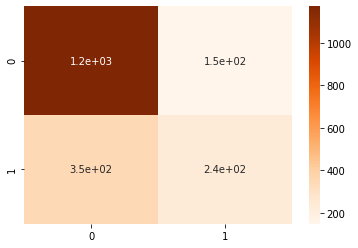

In [41]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,cmap='Oranges')

In [42]:
## Printing classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82      1321
           1       0.62      0.40      0.49       589

    accuracy                           0.74      1910
   macro avg       0.69      0.65      0.66      1910
weighted avg       0.72      0.74      0.72      1910



In [43]:
## Let's try to improve the model accuracy
lgr2=LogisticRegression(C=10.0).fit(X_train,y_train)

In [44]:
lgr.score(X_train,y_train)

0.7237432675044884

In [45]:
lgr2.score(X_train,y_train)

0.7237432675044884

In [46]:
lgr.score(X_test,y_test)

0.7387434554973822

In [47]:
lgr2.score(X_test,y_test)

0.7392670157068063

### Our model accuracy has slightly increased. Let's look at the other accuracy measures for our new model. 

In [48]:
y_pred2=lgr2.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

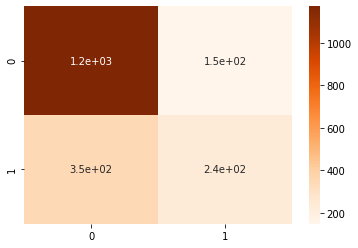

In [50]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_mat, annot=True,cmap='Oranges')
plt.show()

In [51]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred2)
auc

0.6468680798232547

In [52]:
## Printing classification report
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82      1321
           1       0.62      0.41      0.49       589

    accuracy                           0.74      1910
   macro avg       0.69      0.65      0.66      1910
weighted avg       0.72      0.74      0.72      1910



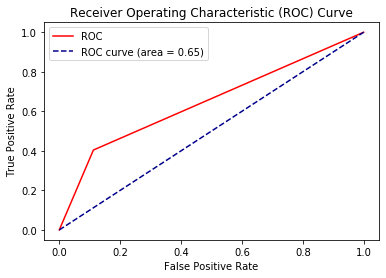

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()